<h1 align='center'> Task1: Prediction using Supervised ML (Level - Beginner)</h1>
<h4 align='center'> Predict the percentage of an student based on the no. of study hours. </h4>

<h3 align='right'> Eben Emmanuel </h3>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the required Data

In [2]:
# Import the data.
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
# Viewing the first 5 rows.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("Dimensionality of the dataset: ", df.shape)

Dimensionality of the dataset:  (25, 2)


### Data Dictionary

- **Hours: ** Number of hours spent by the students to study.

- **Scores: ** Marks obtained by each student for the respective time spent to study.

## 2. Start Building Maching Learning Models

It is important to keep in mind that we will need to train our model and then make it run on unseen data. For this purpose we will be splitting our dataset to Training and Test dataset.

In [5]:
# Splitting our data into Independent ansd dependent variables
X = df.iloc[:,:-1]   # Independent variable (Hours).
y = df.iloc[:,1]   # Dependent cariable (Scores).

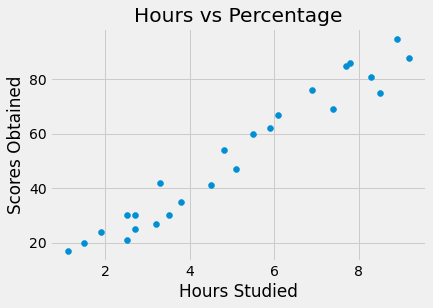

In [6]:
# Visualising the relationship between the Dependent and Independent variables.
plt.scatter(X, y)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores Obtained')  
plt.show()

- **From the above plot we can see that there is a positive relationship between the Hours spent on Studing and Scores obtained.**

In [7]:
# Splitting our data to training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

#### Model: Linear Regression

In [8]:
# Creating and training the model
linear = LinearRegression()

linear.fit(X_train, y_train)      # Training the data.

# Making predictions and evaluating performance
y_pred = linear.predict(X_test)
print('The r-squared value: ', r2_score(y_test,y_pred))

The r-squared value:  0.9487647340257012


- ***Here we can see that the R-squared value is pretty high and is close to 1. Thus we can say that most of the variation in the dependent variable (Scores) is explained by the independent variable (Hours).***

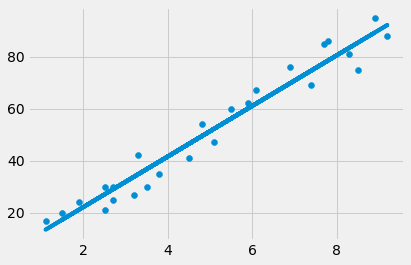

In [9]:
# Plotting the regression line (best-fit line)
best_fit_line = linear.coef_*X + linear.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, best_fit_line)
plt.show()

- **The formula for the best-fitting line (or regression line) is y = mx + b, where m is the slope of the line and b is the y-intercept.**

In [10]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': y_test-y_pred})  
df1 

,Actual,Predicted,Residuals
8,81,83.391686,-2.391686
16,30,27.070549,2.929451
0,21,27.070549,-6.070549
23,76,69.796929,6.203071
11,62,60.086388,1.913612
9,25,29.012657,-4.012657
13,42,34.838982,7.161018
1,47,52.317955,-5.317955


## 3. Predictions

- What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
hrs = [[9.25]]
predicted = linear.predict(hrs)

print(f"No of Hours = {hrs[0][0]}")
print(f"Predicted Score = {predicted[0]}")

No of Hours = 9.25
Predicted Score = 92.61670033840096


- Here we can see that a student who studies for 9.25 hours per day is expected to score 92% for his exam. 